In [3]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/ASUS/.cache/kagglehub/datasets/pradeepsapparapu/bengaluru-house-datacsv/versions/1/Bengaluru_House_Data_with_Coordinates.csv"
data = pd.read_csv(file_path)

# Display basic information and the first few rows to understand the data structure
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   latitude      10291 non-null  float64
 10  longitude     10291 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


(None,
               area_type   availability                  location       size  \
 0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
 1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
 2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
 3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
 4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
 
    society total_sqft  bath  balcony   price   latitude  longitude  
 0  Coomee        1056   2.0      1.0   39.07  12.846854  77.676927  
 1  Theanmp       2600   5.0      3.0  120.00  12.895768  77.867101  
 2      NaN       1440   2.0      3.0   62.00  12.905568  77.545544  
 3  Soiewre       1521   3.0      1.0   95.00  13.002669  77.491542  
 4      NaN       1200   2.0      1.0   51.00  13.061360  77.649389  )

In [5]:
# Handle missing values

# Drop rows where `location` or `latitude` or `longitude` are missing since they are critical for clustering
data = data.dropna(subset=['location', 'latitude', 'longitude'])

# Convert 'size' to a numeric value for BHK (keeping only the number part)
data['bhk'] = data['size'].str.extract('(\d+)').astype(float)

# Convert 'total_sqft' to numeric (handling ranges by taking average if specified as "1000 - 1200")
def convert_sqft_to_num(sqft):
    if '-' in str(sqft):
        values = list(map(float, sqft.split('-')))
        return sum(values) / 2
    try:
        return float(sqft)
    except:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

# Drop any rows where `total_sqft`, `bath`, or `bhk` is still missing after processing
data = data.dropna(subset=['total_sqft', 'bath', 'bhk'])

# Verify the cleaned dataset
data_cleaned_info = data.info()
data_cleaned_head = data.head()

data_cleaned_info, data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
Index: 10191 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10191 non-null  object 
 1   availability  10191 non-null  object 
 2   location      10191 non-null  object 
 3   size          10191 non-null  object 
 4   society       6293 non-null   object 
 5   total_sqft    10191 non-null  float64
 6   bath          10191 non-null  float64
 7   balcony       9776 non-null   float64
 8   price         10191 non-null  float64
 9   latitude      10191 non-null  float64
 10  longitude     10191 non-null  float64
 11  bhk           10191 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.0+ MB


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7512\1206339787.py:7: SyntaxWarning: invalid escape sequence '\d'
  data['bhk'] = data['size'].str.extract('(\d+)').astype(float)


(None,
               area_type   availability                  location       size  \
 0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
 1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
 2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
 3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
 4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
 
    society  total_sqft  bath  balcony   price   latitude  longitude  bhk  
 0  Coomee       1056.0   2.0      1.0   39.07  12.846854  77.676927  2.0  
 1  Theanmp      2600.0   5.0      3.0  120.00  12.895768  77.867101  4.0  
 2      NaN      1440.0   2.0      3.0   62.00  12.905568  77.545544  3.0  
 3  Soiewre      1521.0   3.0      1.0   95.00  13.002669  77.491542  3.0  
 4      NaN      1200.0   2.0      1.0   51.00  13.061360  77.649389  2.0  )

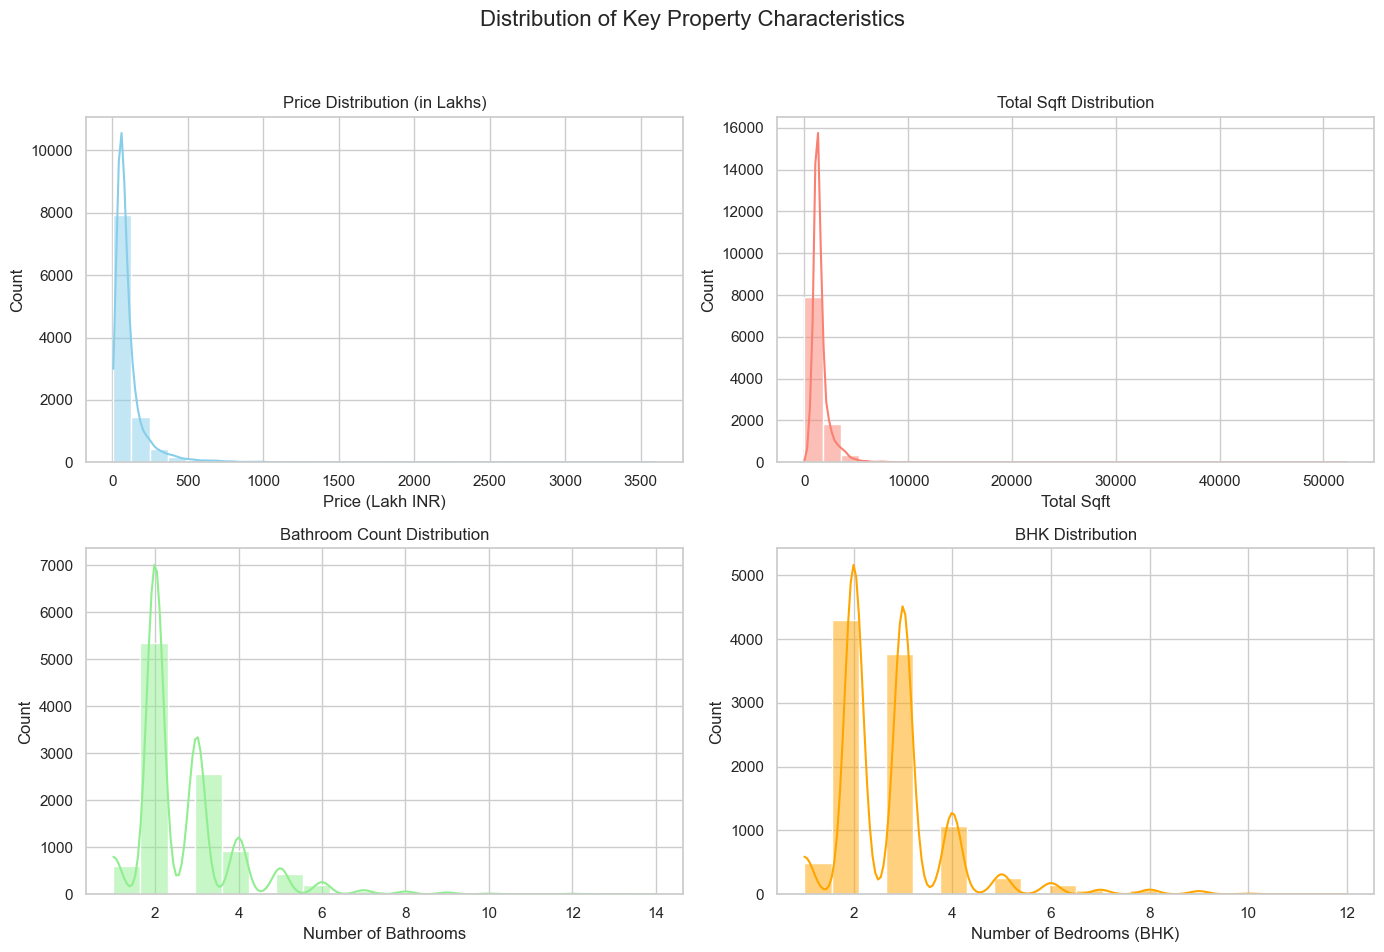

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Plot distribution of price, total_sqft, bath, and bhk to understand the spread of the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Property Characteristics', fontsize=16)

# Price distribution
sns.histplot(data['price'], bins=30, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Price Distribution (in Lakhs)')
axes[0, 0].set_xlabel('Price (Lakh INR)')

# Total Square Footage distribution
sns.histplot(data['total_sqft'], bins=30, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title('Total Sqft Distribution')
axes[0, 1].set_xlabel('Total Sqft')

# Bathroom count distribution
sns.histplot(data['bath'], bins=20, kde=True, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title('Bathroom Count Distribution')
axes[1, 0].set_xlabel('Number of Bathrooms')

# BHK distribution
sns.histplot(data['bhk'], bins=20, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title('BHK Distribution')
axes[1, 1].set_xlabel('Number of Bedrooms (BHK)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


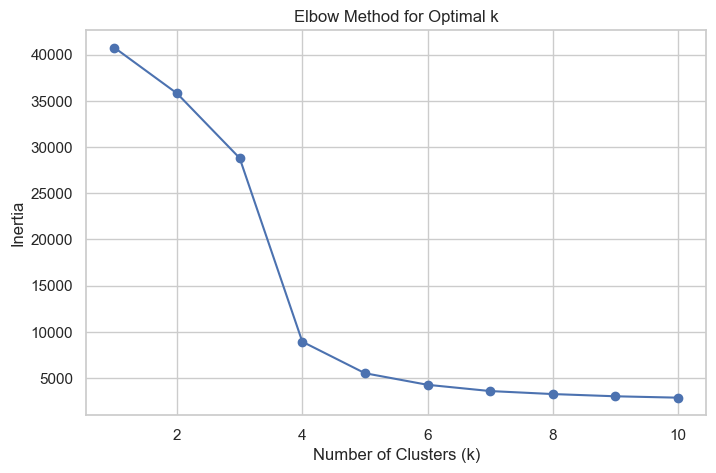

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define the features for clustering
features = data[['latitude', 'longitude', 'price', 'total_sqft']]

# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [9]:
# Apply KMeans clustering with k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with cluster labels
data[['latitude', 'longitude', 'price', 'total_sqft', 'cluster']].head()


latitude  longitude   price  total_sqft  cluster
0  12.846854  77.676927   39.07      1056.0        0
1  12.895768  77.867101  120.00      2600.0        0
2  12.905568  77.545544   62.00      1440.0        0
3  13.002669  77.491542   95.00      1521.0        0
4  13.061360  77.649389   51.00      1200.0        0

In [10]:
pip install folium

In [26]:
import folium
from folium.plugins import MarkerCluster

# Initialize the map centered around the average coordinates in the dataset
map_bangalore = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=11)

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'purple']

# Add points to the map with cluster coloring
marker_cluster = MarkerCluster().add_to(map_bangalore)
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[int(row['cluster'])],
        fill=True,
        fill_color=colors[int(row['cluster'])],
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Display the map inline (in Jupyter Notebook or IPython environment)
map_bangalore


In [21]:
from sklearn.metrics.pairwise import euclidean_distances

def recommend_properties(selected_property_id, data, num_recommendations=5):
    # Get the details of the selected property
    selected_property = data.loc[selected_property_id]
    selected_cluster = selected_property['cluster']
    
    # Filter properties in the same cluster
    cluster_properties = data[data['cluster'] == selected_cluster]
    
    # Define the features for similarity comparison
    features = ['price', 'total_sqft', 'bhk', 'bath']
    selected_features = selected_property[features].values.reshape(1, -1)
    
    # Calculate the Euclidean distance between selected property and all properties in the cluster
    cluster_features = cluster_properties[features].values
    distances = euclidean_distances(selected_features, cluster_features).flatten()
    
    # Get the indices of the closest properties, excluding the selected property itself
    closest_indices = distances.argsort()[1:num_recommendations + 1]
    
    # Retrieve and return the recommended properties
    recommendations = cluster_properties.iloc[closest_indices]
    return recommendations[['location', 'price', 'total_sqft', 'bhk', 'bath']]


In [23]:
# Example: Get recommendations for a property with index 100
selected_property_id = 2000
# Replace with the actual index of a property
recommendations = recommend_properties(selected_property_id, data)
print(recommendations)


               location  price  total_sqft  bhk  bath
8931         Whitefield  115.0      2025.0  3.0   4.0
5855       Haralur Road  105.0      2017.0  3.0   3.0
10160  Ramagondanahalli  114.0      2040.0  3.0   3.0
5951    Old Madras Road  115.0      2010.0  4.0   3.0
10897       Thanisandra  125.0      2030.0  3.0   4.0
